# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [3]:
X=data.drop('MEDV', axis=1)

y=data.MEDV

In [4]:
from sklearn.model_selection import train_test_split as tts



X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [5]:
from sklearn.linear_model import LinearRegression as LinReg

linreg=LinReg()

In [6]:
linreg.fit(X_train, y_train)

LinearRegression()

In [7]:
linreg.coef_

array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
       -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
        2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
       -5.08571424e-01])

In [8]:
linreg.intercept_ 

30.246750993924053

In [9]:
linreg.fit(X_train, y_train)

LinearRegression()

In [10]:
linreg.predict(X_test)[:10]

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597])

In [11]:
y_test.head()

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: MEDV, dtype: float64

## 3. Calculate and print R-squared for both the training and the testing set.

In [12]:
y_pred_train=linreg.predict(X_train)

In [13]:
y_pred=linreg.predict(X_test)

In [14]:
from sklearn.metrics import r2_score as r2

r2(y_test, y_pred)

0.6687594935356332

In [15]:
r2(y_train, y_pred_train)

0.7508856358979673

## 4. Calculate and print mean squared error for both the training and the testing set.

In [16]:
from sklearn.metrics import mean_squared_error as mse

In [17]:
mse(y_test, y_pred, squared=False)

4.928602182665327

In [18]:
mse(y_train, y_pred_train, squared=False)

4.6520331848801675

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [19]:
from sklearn.metrics import mean_absolute_error as mae

mae(y_test, y_pred)

3.1890919658878354

In [20]:
mae(y_train, y_pred_train)

3.3147716267832292

In [21]:
# escribir conclusión aqui

## Classification Model Evaluation

In [22]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [23]:
X=data.drop('class', axis=1)

y=data['class']

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [24]:
from sklearn.linear_model import LogisticRegression

log= LogisticRegression()

In [25]:
from sklearn.model_selection import train_test_split as tts



X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [26]:
log.fit(X_train, y_train)

C:\Users\alexd\Downloads\DescargaAnaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred_train=log.predict(X_train)

In [28]:
y_pred=log.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [29]:
from sklearn.metrics import accuracy_score as acc

In [30]:
acc(y_test, y_pred)

1.0

In [31]:
acc(y_train, y_pred_train)

0.975

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [32]:
from sklearn.metrics import balanced_accuracy_score

In [33]:
balanced_accuracy_score(y_test, y_pred)

1.0

In [34]:
balanced_accuracy_score(y_train, y_pred_train)

0.975609756097561

## 10. Calculate and print the precision score for both the training and the testing set.

In [35]:
from sklearn.metrics import precision_score

In [36]:
precision_score(y_test, y_pred, average='macro')

1.0

In [37]:
precision_score(y_train, y_pred_train, average='macro')

0.9761904761904763

## 11. Calculate and print the recall score for both the training and the testing set.

In [38]:
from sklearn.metrics import recall_score as rec

rec(y_test, y_pred, average='macro')

1.0

In [39]:
rec(y_train, y_pred_train, average='macro')

0.975609756097561

## 12. Calculate and print the F1 score for both the training and the testing set.

In [40]:
from sklearn.metrics import f1_score as f1

f1(y_test, y_pred, average='macro')

1.0

In [41]:
f1(y_train, y_pred_train, average='macro')

0.9749960931395533

## 13. Generate confusion matrices for both the training and the testing set.

In [42]:
from sklearn.metrics import confusion_matrix as cm

cm(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

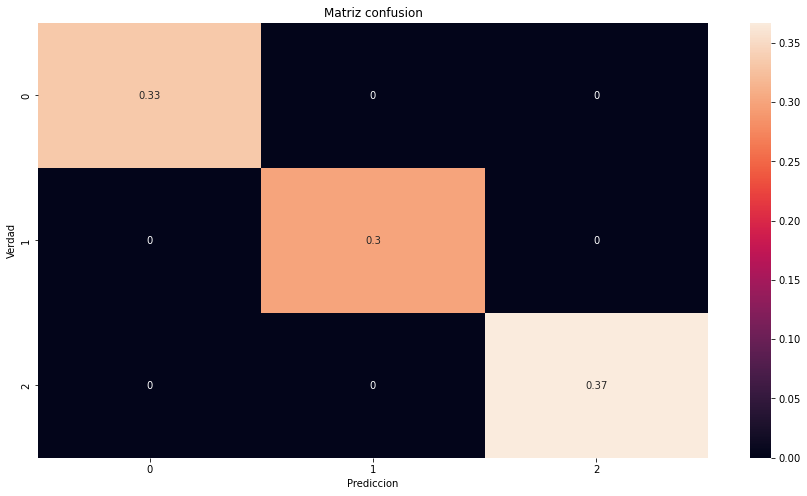

In [44]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

In [45]:
cm(y_train, y_pred_train)

array([[40,  0,  0],
       [ 0, 38,  3],
       [ 0,  0, 39]], dtype=int64)

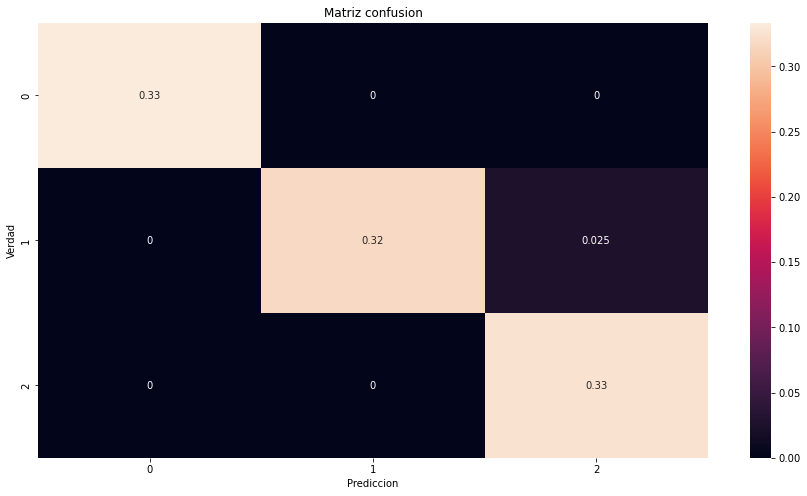

In [46]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_train, y_pred_train)/sum(sum(cm(y_train, y_pred_train))), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

In [47]:
# CONCLUSIÓN FINAL: Casi no hay confusión. Acierta casi siempre.

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.